# Introduction/Business Problem

this project is to find a safe and secure living area in Vancouver, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business in Vancouver.

The first task would be to chose a safe area by analysing crime data.

using data science tools to analyse and focus on the safest area and explore its neighborhoods and the 10 most common venues in each neighborhood.

# Data description

Based on definition of our problem, factors that will influence our decission are:

1. finding the safest area based on crime statistics
2. finding the most common venues
3. choosing the right neighbourhood within the area



data sources
A dataset consisting of the crime statistics of each Neighbourhoof in Vancouver along with type of crime, recorded year, month and hour.

*   TYPE - Crime type
*   MONTH-DAY-YEAR
*   HUNDRED_BLOCK 
*   NEIGHBOURHOOD 
*   GPS longtitude
*   GPS latitude

Data URL: https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2


# Methodology

import library and package

In [1]:
!pip install opencage
!pip install folium

     |████████████████████████████████| 102kB 9.2MB/s ta 0:00:011


In [2]:

import numpy as np
import pandas as pd
from opencage.geocoder import OpenCageGeocode
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans



In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
crime_records_df = pd.read_csv(body, index_col=None)
crime_records_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [5]:
crime_records_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

crime_records_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2012,12,14,8,Oakridge
1,Break and Enter Commercial,2019,3,7,2,Fairview
2,Break and Enter Commercial,2019,8,27,4,West End
3,Break and Enter Commercial,2014,8,8,5,West End
4,Break and Enter Commercial,2005,11,14,3,West End


In [6]:
crime_records_df['NEIGHBOURHOOD'].value_counts()

Central Business District    137513
West End                      48722
Fairview                      36723
Mount Pleasant                36378
Grandview-Woodland            31599
Renfrew-Collingwood           31097
Kitsilano                     30670
Kensington-Cedar Cottage      28418
Strathcona                    25809
Hastings-Sunrise              21272
Sunset                        19686
Marpole                       15137
Riley Park                    14663
Victoria-Fraserview           12310
Killarney                     11847
Oakridge                       9281
Dunbar-Southlands              8792
Kerrisdale                     8470
Arbutus Ridge                  6819
West Point Grey                6761
Shaughnessy                    6321
South Cambie                   6043
Stanley Park                   4174
Musqueam                        571
Name: NEIGHBOURHOOD, dtype: int64

In [7]:
column_names = ['NEIGHBOURHOOD', 'AREA'] 

neigh_area = pd.DataFrame(columns=column_names)

neigh_area['NEIGHBOURHOOD'] = crime_records_df['NEIGHBOURHOOD'].unique()

area_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(area_dict, neigh_area['NEIGHBOURHOOD']):
  neigh_area.loc[neigh_area.NEIGHBOURHOOD == row, 'AREA'] = area_dict.get(row)

neigh_area.dropna(inplace=True)

print("Total Neighbourhood Count",len(neigh_area['NEIGHBOURHOOD']),"Area Count",len(neigh_area['AREA'].unique()))

neigh_area.head()

Total Neighbourhood Count 24 Area Count 4


,NEIGHBOURHOOD,AREA
0,Oakridge,West Side
1,Fairview,West Side
2,West End,Central
3,Central Business District,Central
4,Hastings-Sunrise,East Side


In [8]:
area_crime = pd.merge(crime_records_df,neigh_area, on='NEIGHBOURHOOD')

area_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,AREA
0,Break and Enter Commercial,2012,12,14,8,Oakridge,West Side
1,Break and Enter Commercial,2008,10,23,17,Oakridge,West Side
2,Break and Enter Commercial,2006,12,9,23,Oakridge,West Side
3,Break and Enter Commercial,2010,12,4,3,Oakridge,West Side
4,Break and Enter Commercial,2011,5,28,14,Oakridge,West Side


### create new df with area 

In [9]:
crime_df = pd.merge(crime_records_df,neigh_area, on='NEIGHBOURHOOD')

crime_df['AREA'].value_counts()

East Side          208922
Central            190409
West Side          135017
South Vancouver     24728
Name: AREA, dtype: int64

### create a dataset with crime by area

In [10]:
crime_by_area = pd.pivot_table(crime_df,
                               values=['YEAR'],
                               index=['AREA'],
                               columns=['TYPE'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
crime_by_area

YEAR                                    \
TYPE            Break and Enter Commercial Break and Enter Residential/Other   
AREA                                                                           
Central                              14195                              7546   
East Side                            14314                             29165   
South Vancouver                        814                              5018   
West Side                             9590                             24646   
All                                  38913                             66375   

                                                                          \
TYPE            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
AREA                                                                       
Central            27577       31641              84552            12157   
East Side          34447       21443              67366             9416   
South Vancouver     4117         957               8864              388   
West Side          17529       10565              46856             9016   
All                83670       64606             207638            30977   

                                  \
TYPE            Theft of Vehicle   
AREA                               
Central                     7373   
East Side                  20967   
South Vancouver             2896   
West Side                  10214   
All                        41450   

                                                                        \
TYPE            Vehicle Collision or Pedestrian Struck (with Fatality)   
AREA                                                                     
Central                                                         59       
East Side                                                      126       
South Vancouver                                                 26       
West Side                                                       76       
All                                                            287       

                                                                              
TYPE            Vehicle Collision or Pedestrian Struck (with Injury)     All  
AREA                                                                          
Central                                                       5309    190409  
East Side                                                    11678    208922  
South Vancouver                                               1648     24728  
West Side                                                     6525    135017  
All                                                          25160    559076

In [11]:
crime_by_area.reset_index(inplace = True)
crime_by_area.columns = crime_by_area.columns.map(''.join)
crime_by_area.rename(columns={'YEARAll':'Total'}, inplace=True)

crime_by_area

,AREA,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,14195,7546,27577,31641,84552,12157,7373,59,5309,190409
1,East Side,14314,29165,34447,21443,67366,9416,20967,126,11678,208922
2,South Vancouver,814,5018,4117,957,8864,388,2896,26,1648,24728
3,West Side,9590,24646,17529,10565,46856,9016,10214,76,6525,135017
4,All,38913,66375,83670,64606,207638,30977,41450,287,25160,559076


### create a dataset with crime by neighbourhood

In [12]:
crime_by_neigh = pd.pivot_table(crime_df,
                               values=['YEAR'],
                               index=['NEIGHBOURHOOD'],
                               columns=['TYPE'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
crime_by_neigh.head()

YEAR  \
TYPE                      Break and Enter Commercial   
NEIGHBOURHOOD                                          
Arbutus Ridge                                    352   
Central Business District                      10799   
Dunbar-Southlands                                316   
Fairview                                        3717   
Grandview-Woodland                              2426   

                                                                      \
TYPE                      Break and Enter Residential/Other Mischief   
NEIGHBOURHOOD                                                          
Arbutus Ridge                                          1848     1041   
Central Business District                              3827    20878   
Dunbar-Southlands                                      2056     1490   
Fairview                                               4023     3797   
Grandview-Woodland                                     4892     5750   

                                                                           \
TYPE                      Other Theft Theft from Vehicle Theft of Bicycle   
NEIGHBOURHOOD                                                               
Arbutus Ridge                     386               2120              209   
Central Business District       24367              61019             8455   
Dunbar-Southlands                 310               3353              289   
Fairview                         4013              13701             3974   
Grandview-Woodland               3051               8964             1687   

                                            \
TYPE                      Theft of Vehicle   
NEIGHBOURHOOD                                
Arbutus Ridge                          525   
Central Business District             4412   
Dunbar-Southlands                      656   
Fairview                              2166   
Grandview-Woodland                    3433   

                                                                                  \
TYPE                      Vehicle Collision or Pedestrian Struck (with Fatality)   
NEIGHBOURHOOD                                                                      
Arbutus Ridge                                                              4       
Central Business District                                                 45       
Dunbar-Southlands                                                          4       
Fairview                                                                  14       
Grandview-Woodland                                                        10       

                                                                                \
TYPE                      Vehicle Collision or Pedestrian Struck (with Injury)   
NEIGHBOURHOOD                                                                    
Arbutus Ridge                                                            334     
Central Business District                                               3711     
Dunbar-Southlands                                                        318     
Fairview                                                                1318     
Grandview-Woodland                                                      1386     

                                   
TYPE                          All  
NEIGHBOURHOOD                      
Arbutus Ridge                6819  
Central Business District  137513  
Dunbar-Southlands            8792  
Fairview                    36723  
Grandview-Woodland          31599

In [13]:
crime_by_neigh.reset_index(inplace = True)
crime_by_neigh.columns = crime_by_neigh.columns.map(''.join)
crime_by_neigh.rename(columns={'YEARAll':'Total'}, inplace=True)

crime_by_neigh

,NEIGHBOURHOOD,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,352,1848,1041,386,2120,209,525,4,334,6819
1,Central Business District,10799,3827,20878,24367,61019,8455,4412,45,3711,137513
2,Dunbar-Southlands,316,2056,1490,310,3353,289,656,4,318,8792
3,Fairview,3717,4023,3797,4013,13701,3974,2166,14,1318,36723
4,Grandview-Woodland,2426,4892,5750,3051,8964,1687,3433,10,1386,31599
5,Hastings-Sunrise,1036,3500,3404,1608,7126,471,2669,18,1440,21272
6,Kensington-Cedar Cottage,1434,4468,4402,3305,8870,1050,3108,17,1764,28418
7,Kerrisdale,384,2080,1186,293,3194,213,593,7,520,8470
8,Killarney,375,2263,1986,329,4606,214,1395,14,665,11847
9,Kitsilano,2330,4758,4313,2129,10550,2886,2502,14,1188,30670


describe data

In [14]:
crime_by_area.describe()

,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,15565.200000,26550.000000,33468.000000,25842.400000,83055.200000,12390.800000,16580.000000,114.80000,10064.000000,223630.400000
std,14158.598366,24603.216792,30296.188077,24537.100742,75139.839135,11289.457591,15413.543801,102.81391,9171.393215,200784.865212
min,814.000000,5018.000000,4117.000000,957.000000,8864.000000,388.000000,2896.000000,26.00000,1648.000000,24728.000000
25%,9590.000000,7546.000000,17529.000000,10565.000000,46856.000000,9016.000000,7373.000000,59.00000,5309.000000,135017.000000
50%,14195.000000,24646.000000,27577.000000,21443.000000,67366.000000,9416.000000,10214.000000,76.00000,6525.000000,190409.000000
75%,14314.000000,29165.000000,34447.000000,31641.000000,84552.000000,12157.000000,20967.000000,126.00000,11678.000000,208922.000000
max,38913.000000,66375.000000,83670.000000,64606.000000,207638.000000,30977.000000,41450.000000,287.00000,25160.000000,559076.000000


In [15]:
crime_by_neigh.describe()

,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
mean,3113.040000,5310.00000,6693.600000,5168.480000,16611.040000,2478.16000,3316.000000,22.960000,2012.800000,44726.080000
std,7778.403315,12789.15307,16546.229961,13315.021743,41518.732543,6232.14034,8035.566279,55.743819,4882.759141,110470.308038
min,18.000000,70.00000,112.000000,1.000000,229.000000,9.00000,44.000000,1.000000,65.000000,571.000000
25%,365.000000,2056.00000,1041.000000,329.000000,3132.000000,244.00000,593.000000,6.000000,477.000000,8470.000000
50%,1036.000000,2763.00000,2205.000000,1252.000000,5200.000000,446.00000,1709.000000,11.000000,1101.000000,15137.000000
75%,2426.000000,3827.00000,4507.000000,3305.000000,10024.000000,1687.00000,2881.000000,17.000000,1440.000000,31097.000000
max,38913.000000,66375.00000,83670.000000,64606.000000,207638.000000,30977.00000,41450.000000,287.000000,25160.000000,559076.000000


### sording data, find highest and lowest crimes Neighbourhoods in Vancouver.

find Highest

In [16]:
crime_by_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

Highest_crime_neigh = crime_by_neigh.iloc[1:6]
Highest_crime_neigh

,NEIGHBOURHOOD,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,10799,3827,20878,24367,61019,8455,4412,45,3711,137513
22,West End,3304,3649,6420,7256,20401,3449,2881,8,1354,48722
3,Fairview,3717,4023,3797,4013,13701,3974,2166,14,1318,36723
11,Mount Pleasant,3278,3583,4893,4857,11703,3325,2881,18,1840,36378
4,Grandview-Woodland,2426,4892,5750,3051,8964,1687,3433,10,1386,31599


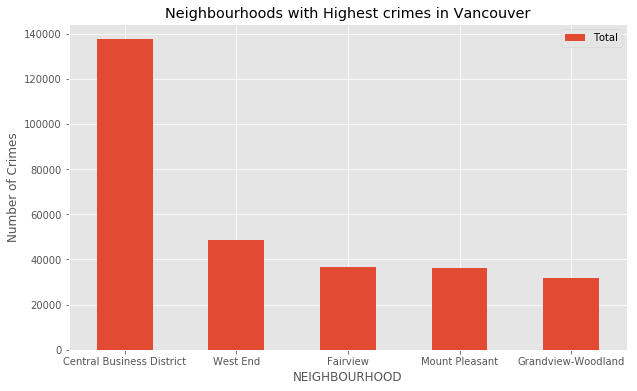

In [17]:
per_neigh = Highest_crime_neigh[['NEIGHBOURHOOD','Total']]

per_neigh.set_index('NEIGHBOURHOOD',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('NEIGHBOURHOOD')
ax.set_title('Neighbourhoods with Highest crimes in Vancouver')


plt.show()


find lowest

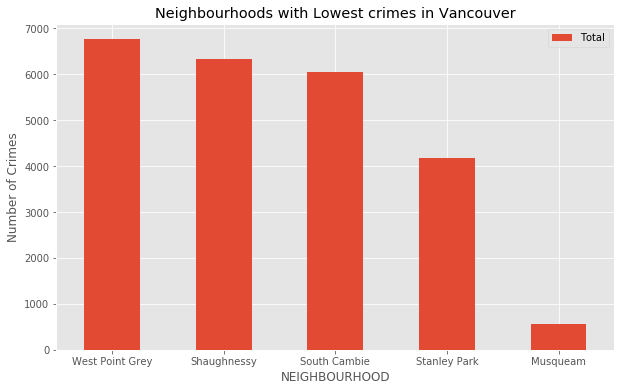

In [18]:

crime_neigh_low = crime_by_neigh.tail(5)

per_neigh = crime_neigh_low[['NEIGHBOURHOOD','Total']]

per_neigh.set_index('NEIGHBOURHOOD',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('NEIGHBOURHOOD')
ax.set_title('Neighbourhoods with Lowest crimes in Vancouver')


plt.show()

### find highest and lowest crimes Area in Vancouver.

In [19]:

crime_by_area = crime_by_area.head(4)
crime_by_area

,AREA,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,14195,7546,27577,31641,84552,12157,7373,59,5309,190409
1,East Side,14314,29165,34447,21443,67366,9416,20967,126,11678,208922
2,South Vancouver,814,5018,4117,957,8864,388,2896,26,1648,24728
3,West Side,9590,24646,17529,10565,46856,9016,10214,76,6525,135017


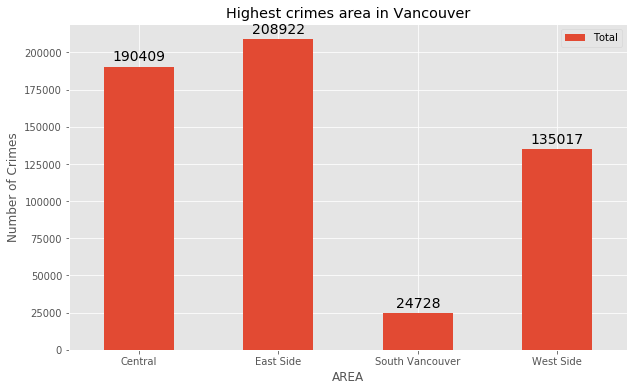

In [20]:
per_area = crime_by_area[['AREA','Total']]

per_area.set_index('AREA',inplace = True)

ax = per_area.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('AREA')
ax.set_title('Highest crimes area in Vancouver')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

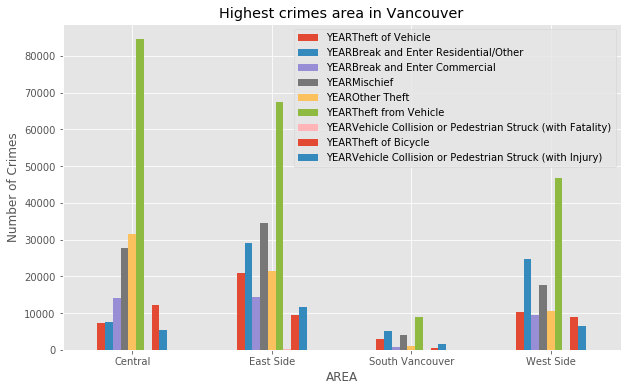

In [21]:
per_area = crime_by_area[['AREA','YEARTheft of Vehicle', 'YEARBreak and Enter Residential/Other','YEARBreak and Enter Commercial','YEARMischief','YEAROther Theft',
                 'YEARTheft from Vehicle','YEARVehicle Collision or Pedestrian Struck (with Fatality)','YEARTheft of Bicycle',
                 'YEARVehicle Collision or Pedestrian Struck (with Injury)']]

per_area.set_index('AREA',inplace = True)

ax = per_area.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('AREA')
ax.set_title('Highest crimes area in Vancouver')



plt.show()

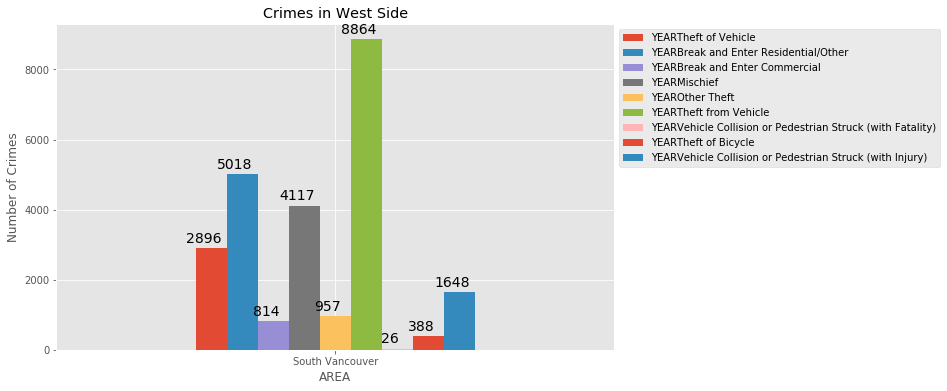

In [22]:
 WS_df = crime_by_area[crime_by_area['AREA'] == 'South Vancouver']

 WS_df = WS_df.sort_values(['Total'], ascending = True, axis = 0)

vnc_ws = WS_df[['AREA','YEARTheft of Vehicle', 'YEARBreak and Enter Residential/Other','YEARBreak and Enter Commercial','YEARMischief','YEAROther Theft',
                 'YEARTheft from Vehicle','YEARVehicle Collision or Pedestrian Struck (with Fatality)','YEARTheft of Bicycle',
                 'YEARVehicle Collision or Pedestrian Struck (with Injury)']]
vnc_ws.set_index('AREA',inplace = True)

ax = vnc_ws.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('AREA')
ax.set_title('Crimes in West Side')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/10, p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

###  Create new  dataset of the Neighborhoods with area, and show it on map.

In [23]:
sv_neigh = area_crime

sv_neigh = sv_neigh[sv_neigh['AREA'] == 'South Vancouver']
sv_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in South Vancouver', len(sv_neigh['NEIGHBOURHOOD'].unique()))

sv_neigh['NEIGHBOURHOOD'].unique()

Number of Neighbourhoods in South Vancouver 3


array(['Victoria-Fraserview', 'Killarney', 'Musqueam'], dtype=object)

In [24]:
Latitude = []
Longitude = []
Area = []
Neighbourhood = sv_neigh['NEIGHBOURHOOD'].unique()


key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Area.append('South Vancouver')
print(Latitude, Longitude,Neighbourhood)

[49.2184156, 49.2242738, 49.2346005] [-123.0732871, -123.0462504, -123.183397] ['Victoria-Fraserview' 'Killarney' 'Musqueam']


In [25]:
sv_neig_dict = {'NEIGHBOURHOOD': Neighbourhood,'Area':Area,'Latitude': Latitude,'Longitude':Longitude}
sv_neig_geo = pd.DataFrame(data=sv_neig_dict, columns=['NEIGHBOURHOOD', 'Area', 'Latitude', 'Longitude'], index=None)

sv_neig_geo

,NEIGHBOURHOOD,Area,Latitude,Longitude
0,Victoria-Fraserview,South Vancouver,49.218416,-123.073287
1,Killarney,South Vancouver,49.224274,-123.046250
2,Musqueam,South Vancouver,49.234600,-123.183397


In [26]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

In [27]:
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(sv_neig_geo['Latitude'], sv_neig_geo['Longitude'], sv_neig_geo['Area'], sv_neig_geo['NEIGHBOURHOOD']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map

### Creating a new consolidated dataset of the Neighborhoods, are, and the most common venues

Setting Foursquare Credentials

In [28]:
CLIENT_ID = 'XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L'
CLIENT_SECRET = 'T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ'
VERSION = '20191101'
LIMIT = 100

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
sv_venues = getNearbyVenues(names=sv_neig_geo['NEIGHBOURHOOD'],
                                   latitudes=sv_neig_geo['Latitude'],
                                   longitudes=sv_neig_geo['Longitude']
                                  )

Victoria-Fraserview
Killarney
Musqueam


In [31]:
print(sv_venues.shape)
sv_venues

(21, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Victoria-Fraserview,49.218416,-123.073287,Subway,Sandwich Place
1,Victoria-Fraserview,49.218416,-123.073287,7-Eleven,Convenience Store
2,Victoria-Fraserview,49.218416,-123.073287,Petro-Canada,Gas Station
3,Victoria-Fraserview,49.218416,-123.073287,Hometown Pizza,Pizza Place
4,Victoria-Fraserview,49.218416,-123.073287,McDonald's,Fast Food Restaurant
5,Killarney,49.224274,-123.046250,Killarney Pool,Pool
6,Killarney,49.224274,-123.046250,Killarney Track,Track
7,Killarney,49.224274,-123.046250,Columbus Restaurant,Italian Restaurant
8,Killarney,49.224274,-123.046250,Killarney Fitness Centre,Gym
9,Musqueam,49.234600,-123.183397,Crépe Café,Café


In [32]:
sv_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Killarney,4
Musqueam,12
Victoria-Fraserview,5


In [33]:
# one hot encoding
onehot = pd.get_dummies(sv_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighbourhood'] = sv_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighbourhood,Bus Stop,Café,Coffee Shop,Convenience Store,Fast Food Restaurant,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Italian Restaurant,Japanese Restaurant,Liquor Store,Pet Store,Pizza Place,Pool,Sandwich Place,Track
0,Victoria-Fraserview,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Victoria-Fraserview,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria-Fraserview,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Victoria-Fraserview,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Victoria-Fraserview,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
vs_grouped = onehot.groupby('Neighbourhood').mean().reset_index()
vs_grouped

,Neighbourhood,Bus Stop,Café,Coffee Shop,Convenience Store,Fast Food Restaurant,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Italian Restaurant,Japanese Restaurant,Liquor Store,Pet Store,Pizza Place,Pool,Sandwich Place,Track
0,Killarney,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.250000,0.000000,0.25,0.000000,0.000000,0.000000,0.0,0.25,0.0,0.25
1,Musqueam,0.083333,0.083333,0.083333,0.0,0.0,0.0,0.25,0.083333,0.083333,0.00,0.083333,0.166667,0.083333,0.0,0.00,0.0,0.00
2,Victoria-Fraserview,0.000000,0.000000,0.000000,0.2,0.2,0.2,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.2,0.00,0.2,0.00


In [35]:
top_venues = 3

for hood in vs_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vs_grouped[vs_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Killarney----
                venue  freq
0               Track  0.25
1  Italian Restaurant  0.25
2                Pool  0.25


----Musqueam----
           venue  freq
0  Grocery Store  0.25
1   Liquor Store  0.17
2       Bus Stop  0.08


----Victoria-Fraserview----
                  venue  freq
0        Sandwich Place   0.2
1     Convenience Store   0.2
2  Fast Food Restaurant   0.2




In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vs_grouped['Neighbourhood']

for ind in np.arange(vs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vs_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Killarney,Track,Pool,Italian Restaurant,Gym,Grocery Store,Café,Coffee Shop,Convenience Store,Fast Food Restaurant,Gas Station
1,Musqueam,Grocery Store,Liquor Store,Gym / Fitness Center,Gym,Café,Coffee Shop,Bus Stop,Japanese Restaurant,Pet Store,Italian Restaurant
2,Victoria-Fraserview,Pizza Place,Convenience Store,Fast Food Restaurant,Gas Station,Sandwich Place,Track,Grocery Store,Café,Coffee Shop,Gym / Fitness Center


In [38]:
kclusters = 3

vnc_grouped_clustering = vs_grouped.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

kmeans.labels_[0:10]

array([0, 2, 1], dtype=int32)

In [39]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
vancouver_merged = sv_neig_geo

vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='NEIGHBOURHOOD')

vancouver_merged.head()

,NEIGHBOURHOOD,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Victoria-Fraserview,South Vancouver,49.218416,-123.073287,1,Pizza Place,Convenience Store,Fast Food Restaurant,Gas Station,Sandwich Place,Track,Grocery Store,Café,Coffee Shop,Gym / Fitness Center
1,Killarney,South Vancouver,49.224274,-123.046250,0,Track,Pool,Italian Restaurant,Gym,Grocery Store,Café,Coffee Shop,Convenience Store,Fast Food Restaurant,Gas Station
2,Musqueam,South Vancouver,49.234600,-123.183397,2,Grocery Store,Liquor Store,Gym / Fitness Center,Gym,Café,Coffee Shop,Bus Stop,Japanese Restaurant,Pet Store,Italian Restaurant


In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['NEIGHBOURHOOD'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South Vancouver,Track,Pool,Italian Restaurant,Gym,Grocery Store,Café,Coffee Shop,Convenience Store,Fast Food Restaurant,Gas Station


In [42]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Vancouver,Pizza Place,Convenience Store,Fast Food Restaurant,Gas Station,Sandwich Place,Track,Grocery Store,Café,Coffee Shop,Gym / Fitness Center


In [43]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,South Vancouver,Grocery Store,Liquor Store,Gym / Fitness Center,Gym,Café,Coffee Shop,Bus Stop,Japanese Restaurant,Pet Store,Italian Restaurant


## Results and Discussion

The objective of the business problem was to help stakeholders identify one of the safest borough in Vancouver, and an appropriate neighborhood within the borough to set up a commercial establishment especially a Grocery store. This has been achieved by first making use of Vancouver crime data to identify a safe borugh with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.

# Conclusion

We have explored the crime data to understand different types of crimes in all neighborhoods of Vancouver and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the area the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.